Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
#loading the csv data to a Pandas Dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [3]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
#getting some basic informations about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#Checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.corr( )

<AxesSubplot:>

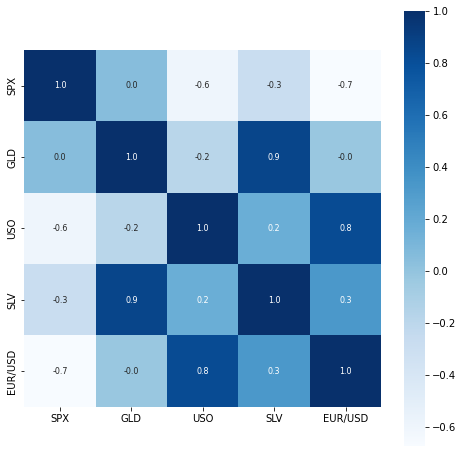

In [10]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [11]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


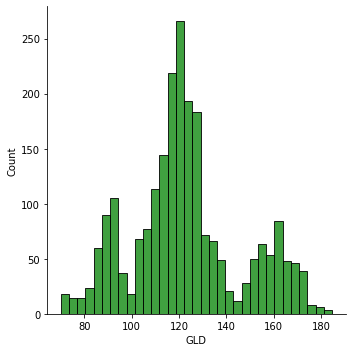

In [12]:
#checking the distribution of the GLD price
sns.displot(gold_data['GLD'],color='green')

Splitting the features and Target

In [13]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data and Test Data

In [16]:
X_train,X_test,Y_Train, Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

In [17]:
regressor=RandomForestRegressor(n_estimators=100)

In [18]:
#training the model
regressor.fit(X_train,Y_Train)

RandomForestRegressor()

Model Evaluation

In [19]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.5306995   82.18210002 115.88880071 127.63870059 120.60150149
 154.76509719 150.29329876 126.05230072 117.45049872 125.95810048
 116.48110095 172.50650101 141.31539829 167.74879864 115.14360031
 117.43890056 137.35100341 170.55880107 159.26060256 158.71439975
 155.22480039 125.00670035 176.02929987 157.19290331 125.19100052
  93.96439965  77.9897002  120.53529997 119.1485995  167.47879971
  88.33490057 125.21110006  91.01840057 117.74020009 121.0912991
 136.61280128 115.67310105 115.29870077 146.52889986 107.20000082
 104.26170212  87.19539776 126.58320004 118.25419965 153.68649905
 119.6359001  108.47649994 108.18659824  93.16400047 127.11779752
  75.27850013 113.60449973 121.01810005 111.15199924 118.82139881
 120.69149952 159.33499992 168.48280106 147.01969616  85.8456988
  94.51520033  86.89179913  90.5930001  118.8434005  126.40700062
 127.61750038 169.36889992 122.18799933 117.28049899  98.35070034
 167.25940141 142.73549887 131.73300246 121.13430223 121.13769908
 119.7344006

In [21]:
#R squareed error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9895466603341088


Compare the actual and predicted values in a plot

In [22]:
Y_test=list(Y_test)

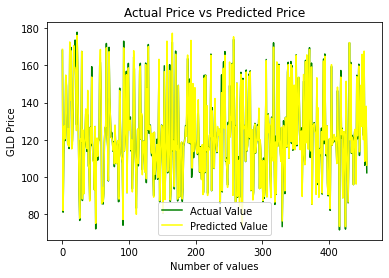

In [23]:
plt.plot(Y_test,color='green',label='Actual Value')
plt.plot(test_data_prediction,color='yellow',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()